In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go


In [6]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

In [2]:
# Load EEG
df = pd.read_parquet('1001487592.parquet') # ('1000086677.parquet')
df

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,64.070000,58.750000,60.349998,82.410004,83.209999,74.430000,81.879997,77.360001,50.240002,46.520000,64.599998,105.800003,80.550003,57.689999,81.610001,98.360001,86.660004,78.949997,68.589996,-93.580002
1,-68.849998,-70.180000,-65.400002,-41.740002,-43.330002,-47.849998,-42.529999,-21.000000,-78.690002,-81.349998,-49.980000,-34.290001,-47.590000,-67.260002,-40.939999,-29.770000,-36.689999,-43.599998,-44.130001,-90.919998
2,-59.810001,-59.020000,-49.450001,-17.010000,-29.240000,-29.770000,-17.010000,-2.660000,-67.790001,-59.549999,-30.570000,-21.000000,-34.290001,-41.200001,-13.290000,-9.840000,-12.760000,-14.890000,-18.870001,-114.580002
3,70.709999,72.839996,80.019997,110.059998,98.360001,98.089996,111.650002,102.610001,60.880001,70.980003,88.260002,119.360001,97.830002,90.650002,114.839996,120.959999,119.099998,113.779999,100.750000,-107.129997
4,-48.119999,-43.599998,-37.220001,-15.150000,-21.000000,-22.059999,-13.820000,1.860000,-55.029999,-56.889999,-24.459999,-5.580000,-19.139999,-36.150002,-9.570000,1.060000,-3.460000,-9.840000,-13.290000,-89.589996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,12.760000,29.510000,58.220001,114.580002,12.760000,28.980000,99.160004,125.209999,20.469999,81.080002,112.720001,1.860000,-23.129999,45.990002,103.940002,-14.890000,7.180000,65.400002,117.769997,-110.330002
11596,-52.639999,-39.080002,-14.620000,32.430000,-59.279999,-47.590000,16.480000,55.560001,-51.570000,-0.800000,39.080002,-74.430000,-101.019997,-38.549999,18.080000,-91.449997,-74.970001,-22.330000,36.150002,-83.470001
11597,-163.490005,-146.210007,-116.699997,-65.930000,-162.160004,-149.399994,-84.010002,-26.320000,-158.970001,-102.879997,-53.970001,-189.809998,-213.729996,-141.960007,-81.610001,-198.050003,-177.580002,-123.610001,-57.950001,-99.949997
11598,-33.230000,-19.410000,7.710000,59.810001,-34.290001,-24.459999,43.330002,72.309998,-32.169998,28.980000,60.610001,-53.169998,-92.510002,-13.290000,41.200001,-69.919998,-52.639999,-1.060000,53.169998,-106.599998


In [3]:
# Create new columns by subtracting the values of the specified columns
df['Fp1-F7'] = df['Fp1'] - df['F7']
df['F7 -T3'] = df['F7'] - df['T3']
df['T3 - T5'] = df['T3'] - df['T5']
df['T5 - O1'] = df['T5'] - df['O1']

df['Fp2-F8'] = df['Fp2'] - df['F8']
df['F8 -T4'] = df['F8'] - df['T4']
df['T4 - T6'] = df['T4'] - df['T6']
df['T6 - O2'] = df['T6'] - df['O2']

df['Fp1-F3'] = df['Fp1'] - df['F3']
df['F3 -C3'] = df['F3'] - df['C3']
df['C3 - P3'] = df['C3'] - df['P3']
df['P3 - O1'] = df['P3'] - df['O1']

df['Fp2-F4'] = df['Fp2'] - df['F4']
df['F4 -C4'] = df['F4'] - df['C4']
df['C4 - P4'] = df['C4'] - df['P4']
df['P4 - O2'] = df['P4'] - df['O2']

df['Fz-Cz'] = df['Fz'] - df['Cz']
df['Cz-Pz'] = df['Cz'] - df['Pz']

In [4]:
# import pandas as pd
# import numpy as np
# from scipy.signal import butter, filtfilt

# # Example DataFrame
# # df = pd.DataFrame({
# #     'column1': np.random.randn(100),
# #     'column2': np.random.randn(100),
# #     ...
# # })
# # Function to design a Butterworth low pass filter
# def butter_lowpass_filter(data, cutoff, fs, order):
#     nyq = 0.5 * fs
#     normal_cutoff = cutoff / nyq
#     b, a = butter(order, normal_cutoff, btype='low', analog=False)
#     y = filtfilt(b, a, data)
#     return y

# # Filter requirements.
# order = 3
# fs = 100     # sample rate, Hz
# cutoff = 1  # desired cutoff frequency of the filter, Hz

# # Apply the filter to each column
# filtered_df = df.apply(lambda x: butter_lowpass_filter(x, cutoff, fs, order))

# # `filtered_df` now contains the filtered data
# filtered_df

In [7]:
# Function to design a Butterworth bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter requirements.
order = 3
fs = 100       # sample rate, Hz
lowcut = 1     # desired low cutoff frequency of the filter, Hz
highcut = 5   # desired high cutoff frequency of the filter, Hz

# Apply the filter to each column
filtered_df = df.apply(lambda x: butter_bandpass_filter(x, lowcut, highcut, fs, order))


In [8]:
shift_values = {'Fp1-F7': 0.5, 'F7 -T3': 20, 'T3 - T5': -25.0, 'T5 - O1': -45.0}  # Customize shift values

# Initialize a Figure object
fig = go.Figure()

# Iterate through each column and create traces
for col, shift in zip(['Fp1-F7',  'F7 -T3' , 'T3 - T5', 'T5 - O1'], shift_values.values()):
    trace = go.Scatter(
        x=filtered_df.index,  # Assuming index represents time or X values
        y=filtered_df[col] + shift,  # Apply shifts
        name=col,
        mode='lines+markers',
    )
    fig.add_trace(trace)

# Configure layout and axis titles
fig.update_layout(
    title="1 Combined Plot with Shifts",
    xaxis_title="Time (or index)",
    yaxis_title="Value",
)

# Display the interactive plot
fig.show()

shift_values = {'Fp2-F8': 20, 'F8 -T4': 0, 'T4 - T6': -45.0, 'T6 - O2': -65.0}  # Customize shift values

# Initialize a Figure object
fig = go.Figure()

# Iterate through each column and create traces
for col, shift in zip(['Fp2-F8', 'F8 -T4', 'T4 - T6', 'T6 - O2'], shift_values.values()):
    trace = go.Scatter(
        x=filtered_df.index,  # Assuming index represents time or X values
        y=filtered_df[col] + shift,  # Apply shifts
        name=col,
        mode='lines+markers',
    )
    fig.add_trace(trace)

# Configure layout and axis titles
fig.update_layout(
    title="2 Combined Plot with Shifts",
    xaxis_title="Time (or index)",
    yaxis_title="Value",
)

# Display the interactive plot
fig.show()

shift_values = {'Fp1-F3': 30, 'F3 -C3':0, 'C3 - P3': -30, 'P3 - O1':-60}  # Customize shift values

# Initialize a Figure object
fig = go.Figure()

# Iterate through each column and create traces
for col, shift in zip(['Fp1-F3', 'F3 -C3', 'C3 - P3', 'P3 - O1'], shift_values.values()):
    trace = go.Scatter(
        x=filtered_df.index,  # Assuming index represents time or X values
        y=filtered_df[col] + shift,  # Apply shifts
        name=col,
        mode='lines+markers',
    )
    fig.add_trace(trace)

# Configure layout and axis titles
fig.update_layout(
    title="3 Combined Plot with Shifts",
    xaxis_title="Time (or index)",
    yaxis_title="Value",
)

# Display the interactive plot
fig.show()

shift_values = {'Fp2-F4': 30, 'F4 -C4':0, 'C4 - P4':-30, 'P4 - O2':-80}  # Customize shift values

# Initialize a Figure object
fig = go.Figure()

# Iterate through each column and create traces
for col, shift in zip(['Fp2-F4', 'F4 -C4','C4 - P4', 'P4 - O2'], shift_values.values()):
    trace = go.Scatter(
        x=filtered_df.index,  # Assuming index represents time or X values
        y=filtered_df[col] + shift,  # Apply shifts
        name=col,
        mode='lines+markers',
    )
    fig.add_trace(trace)

# Configure layout and axis titles
fig.update_layout(
    title="4 Combined Plot with Shifts",
    xaxis_title="Time (or index)",
    yaxis_title="Value",
)

# Display the interactive plot
fig.show()

shift_values = {'Fz-Cz': 20, 'Cz-Pz': -20}  # Customize shift values

# Initialize a Figure object
fig = go.Figure()

# Iterate through each column and create traces
for col, shift in zip(['Fz-Cz', 'Cz-Pz'], shift_values.values()):
    trace = go.Scatter(
        x=filtered_df.index,  # Assuming index represents time or X values
        y=filtered_df[col] + shift,  # Apply shifts
        name=col,
        mode='lines+markers',
    )
    fig.add_trace(trace)

# Configure layout and axis titles
fig.update_layout(
    title="5 Combined Plot with Shifts",
    xaxis_title="Time (or index)",
    yaxis_title="Value",
)

# Display the interactive plot
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Rough EEG

In [ ]:
shift_values = {'Fz-Cz': 20, 'Cz-Pz': -20}  # Customize shift values

# Initialize a Figure object
fig = go.Figure()

# Iterate through each column and create traces
for col, shift in zip(['Fz-Cz', 'Cz-Pz'], shift_values.values()):
    trace = go.Scatter(
        x=filtered_df.index,  # Assuming index represents time or X values
        y=filtered_df[col] + shift,  # Apply shifts
        name=col,
        mode='lines+markers',
    )
    fig.add_trace(trace)

# Configure layout and axis titles
fig.update_layout(
    title="1 Combined Plot with Shifts",
    xaxis_title="Time (or index)",
    yaxis_title="Value",
)

# Display the interactive plot
fig.show()

In [ ]:
shift_values = {'Fp2-F8': 20, 'F8 -T4': 0, 'T4 - T6': -45.0, 'T6 - O2': -65.0}  # Customize shift values

# Initialize a Figure object
fig = go.Figure()

# Iterate through each column and create traces
for col, shift in zip(['Fp2-F8', 'F8 -T4', 'T4 - T6', 'T6 - O2'], shift_values.values()):
    trace = go.Scatter(
        x=filtered_df.index,  # Assuming index represents time or X values
        y=filtered_df[col] + shift,  # Apply shifts
        name=col,
        mode='lines+markers',
    )
    fig.add_trace(trace)

# Configure layout and axis titles
fig.update_layout(
    title="Combined Plot with Shifts",
    xaxis_title="Time (or index)",
    yaxis_title="Value",
)

# Display the interactive plot
fig.show()

In [ ]:
shift_values = {'Fp1-F3': 30, 'F3 -C3':0, 'C3 - P3': -30, 'P3 - O1':-60}  # Customize shift values

# Initialize a Figure object
fig = go.Figure()

# Iterate through each column and create traces
for col, shift in zip(['Fp1-F3', 'F3 -C3', 'C3 - P3', 'P3 - O1'], shift_values.values()):
    trace = go.Scatter(
        x=filtered_df.index,  # Assuming index represents time or X values
        y=filtered_df[col] + shift,  # Apply shifts
        name=col,
        mode='lines+markers',
    )
    fig.add_trace(trace)

# Configure layout and axis titles
fig.update_layout(
    title="Combined Plot with Shifts",
    xaxis_title="Time (or index)",
    yaxis_title="Value",
)

# Display the interactive plot
fig.show()

In [ ]:
filtered_df.columns

Index(['Fp1', 'F3', 'C3', 'P3', 'F7', 'T3', 'T5', 'O1', 'Fz', 'Cz', 'Pz',
       'Fp2', 'F4', 'C4', 'P4', 'F8', 'T4', 'T6', 'O2', 'EKG', 'Fp1-F7',
       'F7 -T3', 'T3 - T5', 'T5 - O1', 'Fp2-F8', 'F8 -T4', 'T4 - T6',
       'T6 - O2', 'Fp1-F3', 'F3 -C3', 'C3 - P3', 'P3 - O1', 'Fp2-F4', 'F4 -C4',
       'C4 - P4', 'P4 - O2'],
      dtype='object')

In [ ]:
shift_values = {'Fp2-F4': 30, 'F4 -C4':0, 'C4 - P4':-30, 'P4 - O2':-80}  # Customize shift values

# Initialize a Figure object
fig = go.Figure()

# Iterate through each column and create traces
for col, shift in zip(['Fp2-F4', 'F4 -C4','C4 - P4', 'P4 - O2'], shift_values.values()):
    trace = go.Scatter(
        x=filtered_df.index,  # Assuming index represents time or X values
        y=filtered_df[col] + shift,  # Apply shifts
        name=col,
        mode='lines+markers',
    )
    fig.add_trace(trace)

# Configure layout and axis titles
fig.update_layout(
    title="Combined Plot with Shifts",
    xaxis_title="Time (or index)",
    yaxis_title="Value",
)

# Display the interactive plot
fig.show()

In [ ]:
# 4 sub plots
# within each plot there will be 4 plots. we have to find a method, so that we shift the scale a bit for each consequetive plot
# to get to these plots, test -> from 0.2 to 4 hz, try. ->  last activity
# we will have same plot ( group of 4) for 5-6 different cases for every class.
# currently code is having low pass filter, i will change to band pass also.
# ################ end of eeg analysis ##################

###############start spectrogram #####################
# write a code that will create the spectrogram that looks like the one given in sample pdf.
# change the colour format.
# spectrogram pe kariye.





In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

# Example DataFrame
# df = pd.DataFrame({
#     'column1': np.random.randn(100),
#     'column2': np.random.randn(100),
#     ...
# })
# Function to design a Butterworth low pass filter
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter requirements.
order = 3
fs = 100     # sample rate, Hz
cutoff = 0.5  # desired cutoff frequency of the filter, Hz

# Apply the filter to each column
filtered_df = df.apply(lambda x: butter_lowpass_filter(x, cutoff, fs, order))

# `filtered_df` now contains the filtered data
filtered_df

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,...,T4,T6,O2,EKG,Fp1-F7,Fp2-F8,Fp1-F3,Fp2-F4,Fz-Cz,T5-O1
0,62.059368,57.025872,70.135234,95.263516,82.674145,77.574943,92.056583,89.685267,44.671550,53.964552,...,92.362246,85.904116,78.427055,-86.183958,-20.614776,2.570065,5.033498,27.097928,-9.293002,2.371317
1,59.420700,54.666924,68.199054,93.566904,80.302899,75.449677,90.289104,88.423530,42.122065,51.897937,...,90.624663,84.341370,77.095149,-85.478428,-20.882198,1.888067,4.753780,26.864135,-9.775872,1.865575
2,56.786998,52.315469,66.266743,91.872847,77.934792,73.324891,88.522883,87.163713,39.576019,49.838895,...,88.883770,82.778759,75.766872,-84.735108,-21.147793,1.207123,4.471532,26.632432,-10.262876,1.359171
3,54.159679,49.972819,64.339241,90.182114,75.571041,71.201596,86.758729,85.906365,37.034775,47.788521,...,87.140262,81.216953,74.442842,-83.953636,-21.411360,0.527662,4.186863,26.402992,-10.753746,0.852366
4,51.540160,47.640280,62.417482,88.495464,73.212860,69.080798,84.997447,84.652030,34.499696,45.747901,...,85.394827,79.656614,73.123665,-83.133676,-21.672699,-0.149884,3.899882,26.175986,-11.248205,0.345418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,-49.752033,-29.907110,-15.659090,11.478936,-27.552271,-1.731537,17.274641,28.658635,-51.302619,-26.182140,...,-42.437169,-36.431201,-7.179894,63.569916,-22.199762,16.642764,-19.844922,36.248487,-25.120478,-11.383994
11596,-49.747936,-29.899950,-15.650563,11.489029,-27.550592,-1.726496,17.282188,28.667538,-51.292350,-26.168121,...,-42.434510,-36.421672,-7.168592,63.536197,-22.197344,16.647144,-19.847986,36.248432,-25.124229,-11.385349
11597,-49.744495,-29.893985,-15.643448,11.497477,-27.549203,-1.722346,17.288491,28.674994,-51.283786,-26.156413,...,-42.432293,-36.413692,-7.159115,63.507917,-22.195292,16.650772,-19.850511,36.248372,-25.127373,-11.386503
11598,-49.741644,-29.889082,-15.637592,11.504447,-27.548069,-1.718977,17.293680,28.681151,-51.276743,-26.146773,...,-42.430470,-36.407105,-7.151281,63.484540,-22.193576,16.653735,-19.852562,36.248314,-25.129970,-11.387471


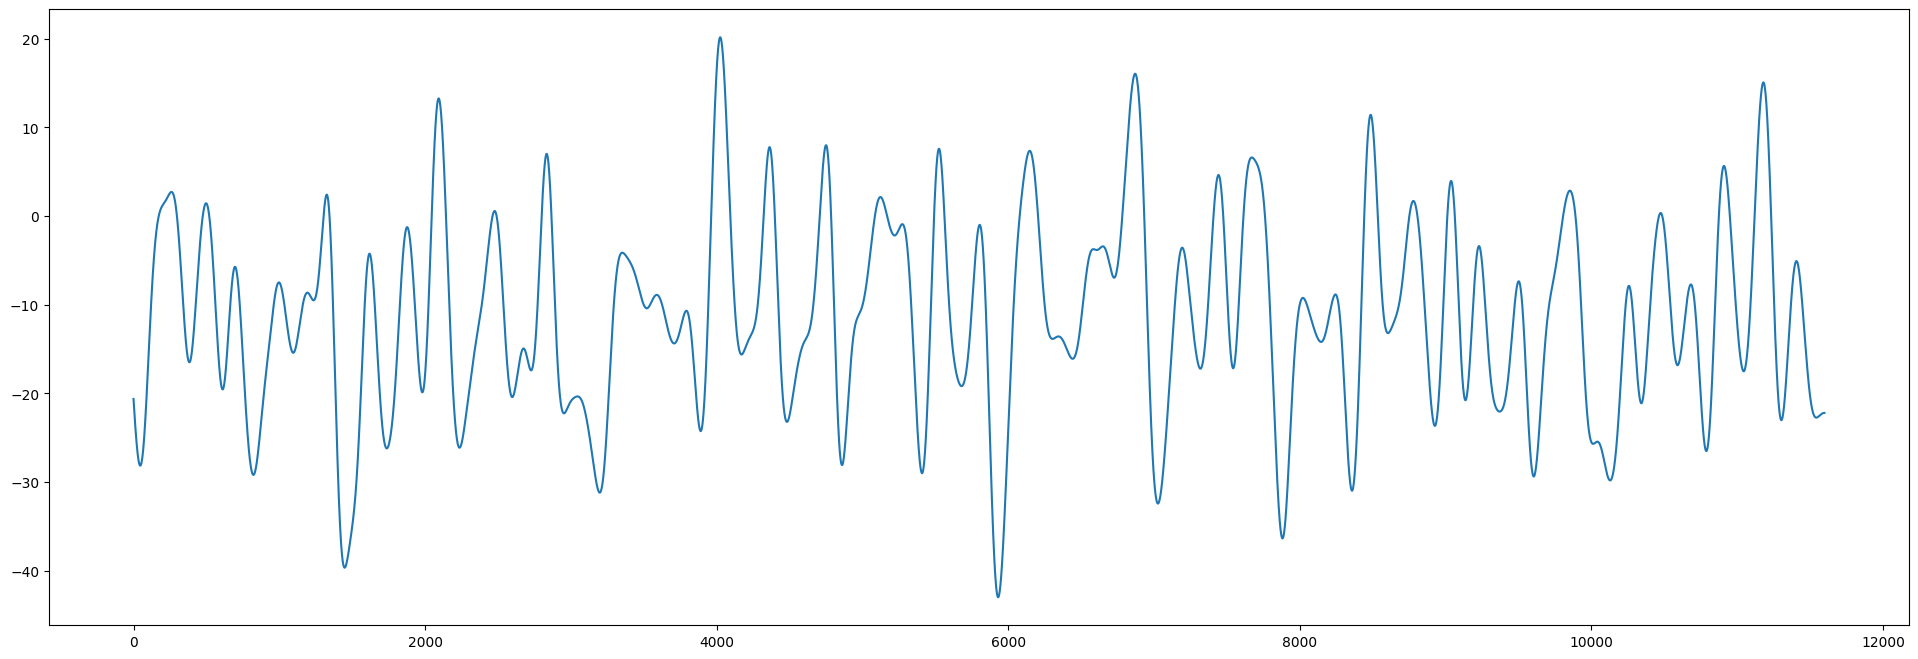

In [ ]:
plt.figure(figsize = (24,8))
plt.plot(filtered_df['Fp1-F7']) # 0-2 hz

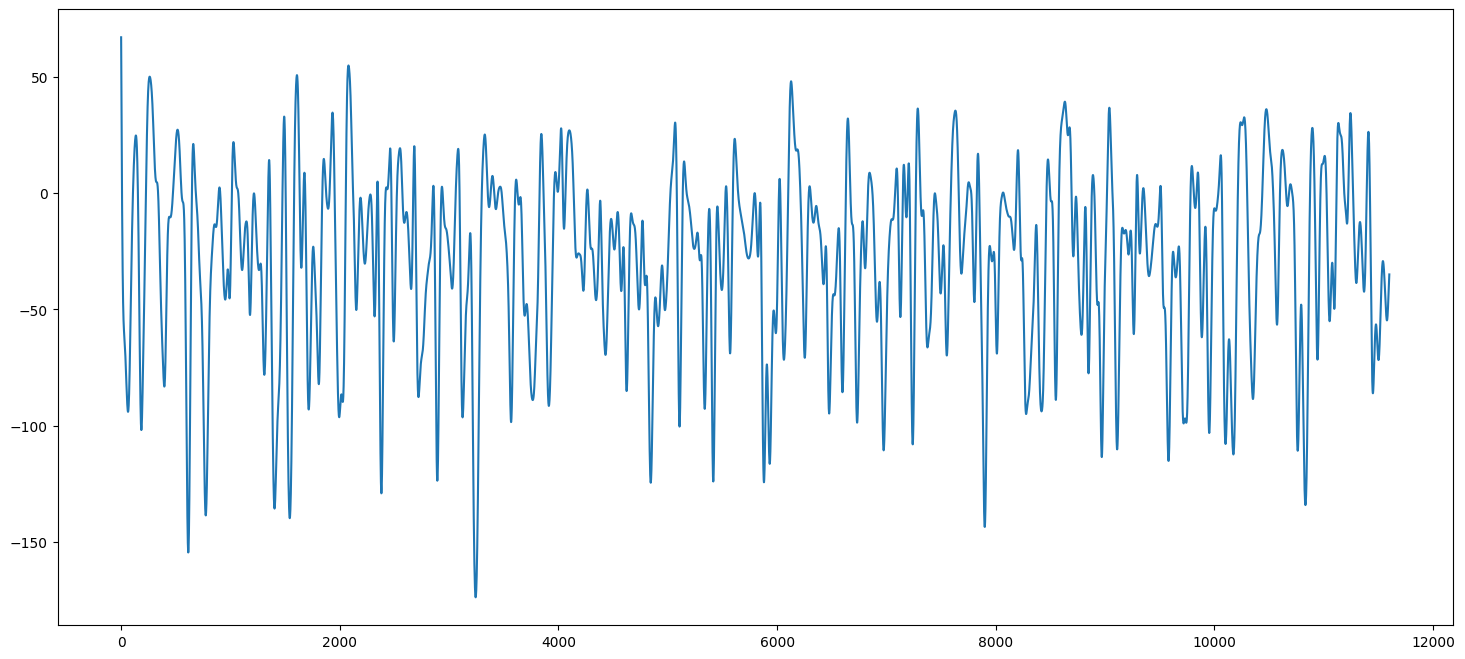

In [ ]:
plt.figure(figsize = (18,8))
plt.plot(filtered_df['Fp1']) # 0-4 hz

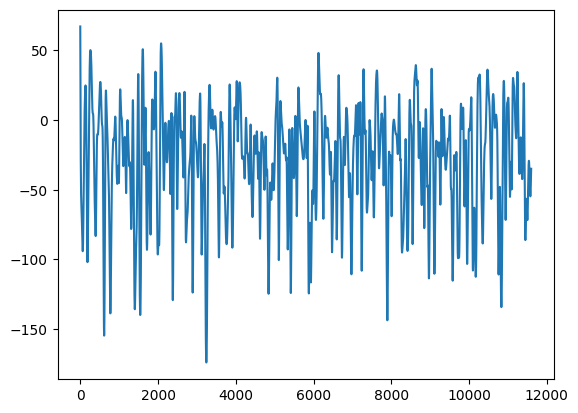

In [ ]:
plt.plot(filtered_df['Fp1'])

In [ ]:
import pandas as pd
import numpy as np

def apply_low_pass_filter(df, cutoff_frequency):
    """Applies a low-pass filter to every numerical column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to filter.
        cutoff_frequency (float): The cutoff frequency for the filter.

    Returns:
        pd.DataFrame: The filtered DataFrame.
    """

    filtered_df = df.copy()  # Avoid modifying the original DataFrame

    # Filter numerical columns only
    for col in df.select_dtypes(include=[np.number]):
        filtered_df[col] = pd.Series(butter_lowpass_filter(df[col], cutoff_frequency), index=df.index)

    return filtered_df

def butter_lowpass(cutoff, fs, order=5):
    """Designs a Butterworth low-pass filter.

    Args:
        cutoff (float): The cutoff frequency in Hz.
        fs (float): The sampling frequency in Hz.
        order (int): The filter order.

    Returns:
        tuple: The numerator (b) and denominator (a) polynomials of the filter.
    """

    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs=1.0, order=5):
    """Applies a Butterworth low-pass filter to a signal.

    Args:
        data (array-like): The signal to filter.
        cutoff (float): The cutoff frequency in Hz.
        fs (float): The sampling frequency in Hz.
        order (int): The filter order.

    Returns:
        array-like: The filtered signal.
    """

    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Example usage (replace with your DataFrame and cutoff frequency):
filtered_df = apply_low_pass_filter(df, cutoff_frequency=10.0)  # Example cutoff frequency


ValueError: Digital filter critical frequencies must be 0 < Wn < 1

In [ ]:
filtered_df.max()

time        283.56045
LL_0.59           NaN
LL_0.78           NaN
LL_0.98           NaN
LL_1.17           NaN
              ...    
RP_19.14          NaN
RP_19.34          NaN
RP_19.53          NaN
RP_19.73          NaN
RP_19.92          NaN
Length: 401, dtype: float64

In [ ]:
print(filtered_df['LL_0.59'][100:120])

100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
105   NaN
106   NaN
107   NaN
108   NaN
109   NaN
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
Name: LL_0.59, dtype: float64
